#                Credit Default Risk Prediction Model with LightGBM

## Business Overview

Credit Risk is the possibility of a loss resulting from a borrower's failure to repay a
loan or meet a contractual obligation. The primary goal of a credit risk assessment is to
find out whether potential borrowers are creditworthy and have the means to repay their
debts so that credit risk or loss can be minimized and the loan is granted to only
creditworthy applicants.


### Approach

* **Data Reading**
* **Data Processing**
* **Define Label**
  - Roll Rtae Analysis
  - Window Analysis
* **Feature Engineering**
* **Exploratory Data Analysis**
* **Target Encoding**
* ML Model Development
  - LightGBM
  - Hyperparameter Tuning using Hyperpot
* **Model Selection**
* **Model Evaluation**
  - ROC AUC
   - PR AUC
   - Score Distribution
* **Feature Importance**
    - Split and Gain
    - SHAP
* **Class Rate Curve and Right Threshold**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import random

#!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, precision_score, average_precision_score

from sklearn.preprocessing import OneHotEncoder

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Credit Default Risk Prediction\credit_risk_data.csv')
df.head()

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0,Female,Yes,4,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0,Female,No,1,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.0,Other,NaN,3,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0,Male,NaN,1,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0,Male,NaN,3,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0,0,0,0,0,0,202203


In [3]:
df[df.duplicated(keep=False)]

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
511,7028680,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGFLSEWdkcndwkcnCCM,<1,62000.0,Other,Yes,4,mortgage,XX335X,Yes,Source Verified,0,22102.56,20000.00,2102.56,0,0,0,0,0,0,0,0,202204
519,7028680,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGFLSEWdkcndwkcnCCM,<1,62000.0,Other,Yes,4,mortgage,XX335X,Yes,Source Verified,0,22102.56,20000.00,2102.56,0,0,0,0,0,0,0,0,202204
979,6643853,NaN,NaN,0,KHMbckjadbckIFGGASEWdkcndwkcnCCM,0,132000.0,Male,NaN,2,mortgage,XX302X,NaN,NaN,0,11481.71,9675.06,1806.65,0,0,0,0,0,0,0,0,202204
987,6643853,NaN,NaN,0,KHMbckjadbckIFGGASEWdkcndwkcnCCM,0,132000.0,Male,NaN,2,mortgage,XX302X,NaN,NaN,0,11481.71,9675.06,1806.65,0,0,0,0,0,0,0,0,202204
1297,6889643,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,5-10,55000.0,Other,No,4,mortgage,XX337X,Yes,NaN,0,3520.40,2253.17,1267.23,0,90,90,90,90,90,90,90,202201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135751,60058535,Salaried,A,0,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,0,110000.0,Female,NaN,0,mortgage,XX281X,Yes,NaN,0,7658.55,6260.27,1398.28,0,0,0,0,0,0,0,0,202201
143373,56742917,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,145000.0,Female,NaN,2,rent,XX606X,No,Source Verified,1,6695.39,6000.00,695.39,0,0,0,0,0,0,0,0,202205
143376,56742917,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,145000.0,Male,NaN,4,mortgage,XX442X,No,Not Verified,1,8572.64,7032.39,1540.25,0,0,0,0,0,0,0,0,202205
143381,56742917,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,145000.0,Female,NaN,2,rent,XX606X,No,Source Verified,1,6695.39,6000.00,695.39,0,0,0,0,0,0,0,0,202205


In [4]:
df = df.drop_duplicates(keep='first')
df.head()

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0,Female,Yes,4,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0,Female,No,1,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.0,Other,NaN,3,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0,Male,NaN,1,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0,Male,NaN,3,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0,0,0,0,0,0,202203


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143047 entries, 0 to 143726
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   User_id             143047 non-null  int64  
 1   employment_type     58768 non-null   object 
 2   tier_of_employment  58768 non-null   object 
 3   industry            143043 non-null  object 
 4   role                143047 non-null  object 
 5   work_experience     143043 non-null  object 
 6   total_income        143047 non-null  float64
 7   gender              143047 non-null  object 
 8   married             95111 non-null   object 
 9   dependents          143047 non-null  int64  
 10  home_type           143047 non-null  object 
 11  pincode             143047 non-null  object 
 12  has_social_profile  95400 non-null   object 
 13  is_verified         107411 non-null  object 
 14  delinq_2yrs         143047 non-null  int64  
 15  total_payement      143047 non-null  fl

## Split Data

Split data on timeline to make sure model developed is able to predict well on Out of time data
<br>**Train** - Yearmo 202201 to 202203
<br>**Validation** - Yearmo 202204
<br>**Hold Out** - Yearmo 202205 (Out of time data)

In [6]:
train = df[df['yearmo']<=202203]
val = df[df['yearmo']==202204]
hold_out = df[df['yearmo']==202205]
train.head()

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0,Female,Yes,4,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0,Female,No,1,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0,0,0,0,0,0,202203
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0,Male,NaN,1,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0,Male,NaN,3,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0,0,0,0,0,0,202203
6,7033985,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,5-10,90000.0,Male,NaN,4,mortgage,XX933X,NaN,Source Verified,0,13252.854964,11500.00,1733.99,0,0,0,0,0,0,0,0,202201


### Define Label - Roll Rate Analysis

In [7]:
dpd_flow = pd.DataFrame({'dpd': [0, 30, 60, 90],
                         'user_count': [(train['max_dpd'] >= dpd).sum() for dpd in [0, 30, 60, 90]]})

dpd_flow['user_percent'] = ((dpd_flow['user_count'] / dpd_flow['user_count'].max()) * 100).round(2).astype(str) + ' %'

dpd_flow

,dpd,user_count,user_percent
0,0,85847,100.0 %
1,30,22019,25.65 %
2,60,8045,9.37 %
3,90,7872,9.17 %


<br>- ~25.6% customer paid back after crossing dpd30
<br>- Most of the people who crossed dpd60 are also crossing dpd 90
<br>**Conclusion** - *DPD60 should be right choice as Recovery rate is low post that*

### Window Roll Rate

In [8]:
dpd=60
df2 = train[train['max_dpd'] >= dpd]

def calculate_first_default(row):
    for i in range(1, 7):
        if row[f'emi_{i}_dpd'] >= dpd:
            return i
    return 0

df2['first_default'] = df2.apply(calculate_first_default, axis=1)

window_roll = df2.groupby('first_default').size().reset_index(name='users_count')
window_roll['% of Users'] = ((window_roll['users_count'] / window_roll['users_count'].sum()) * 100).round(2).astype(str) + ' %'
window_roll.columns = ['first_default_emi', 'users_count', '% of Users']
window_roll

,first_default_emi,users_count,% of Users
0,1,6493,80.71 %
1,2,1083,13.46 %
2,3,421,5.23 %
3,4,22,0.27 %
4,5,18,0.22 %
5,6,8,0.1 %


<br>- 80.7% of Defaulters dafault in 1st EMI and 5.23% default in 3rd EMI, Post 3rd EMI rate is low, so we can conclude people Most of the Defaulter default in 1st 3 EMIs
<br>**Conclusion** - We can use DPD60 in first 3 months as our label

### Label Creation

In [9]:
def create_label(df, dpd, months):
    
    months = ["emi_"+str(x)+"_dpd" for x in range(1, months+1)]
    df['label'] = np.where(df[months].max(axis = 1)>=dpd, 1, 0)
    print("label columns added to dataframe")
    return df

In [10]:
train = create_label(train, dpd = 60, months = 3)
val = create_label(val, dpd = 60, months = 3)
hold_out = create_label(hold_out, dpd = 60, months = 3)

label columns added to dataframe
label columns added to dataframe
label columns added to dataframe


### Label Distribution

In [11]:
def label_distribution(data_list, data_list_name, label_name):
    for i, data in enumerate(data_list):
        label_distribution = data[label_name].value_counts(normalize=True).reset_index()
        label_distribution.columns = [label_name, 'user_count']
        label_distribution['% users'] = (label_distribution['user_count'] * 100).round(2).astype(str) + ' %'
        print(f"\nLabel distribution of {data_list_name[i]}")
        print(label_distribution)


In [12]:
label_distribution([train, val, hold_out], ['Training', 'Validation', 'Hold Out'], 'label')


Label distribution of Training
   label  user_count  % users
0      0    0.906846  90.68 %
1      1    0.093154   9.32 %

Label distribution of Validation
   label  user_count  % users
0      0    0.902369  90.24 %
1      1    0.097631   9.76 %

Label distribution of Hold Out
   label  user_count  % users
0      0    0.909174  90.92 %
1      1    0.090826   9.08 %


- Labels are imbalanced towards class 0
- Same level of Imbalance occure across Train, Validation, Hold Out

## Feature Engineering

In [13]:
def derived_features(df):
    df['interest_received_ratio'] = df['interest_received'] / df['total_payement']
    df['interest_received_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
    df['interest_received_ratio'].fillna(0, inplace=True)
    
    df['total_payement_per_loan'] = df['total_payement'] / df['number_of_loans']
    df['total_payement_per_loan'].replace([np.inf, -np.inf], 0, inplace=True)
    df['total_payement_per_loan'].fillna(0, inplace=True)
    
    df['delinq_2yrs_ratio'] = df['delinq_2yrs'] / df['number_of_loans']
    df['delinq_2yrs_ratio'].replace([np.inf, -np.inf], 0, inplace=True)
    df['delinq_2yrs_ratio'].fillna(0, inplace=True)
    
    return df


In [14]:
train = derived_features(train)
val = derived_features(val)
hold_out = derived_features(hold_out)
train.head()

,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,pincode,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo,label,interest_received_ratio,total_payement_per_loan,delinq_2yrs_ratio
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0,Female,Yes,4,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,0,90,90,90,90,90,90,202203,1,0.467445,0.0,0.0
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0,Female,No,1,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0,0,0,0,0,0,202203,0,0.214404,0.0,0.0
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0,Male,NaN,1,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0,0,0,0,0,0,0,202203,0,0.218787,0.0,0.0
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0,Male,NaN,3,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0,0,0,0,0,0,202203,0,0.152039,0.0,0.0
6,7033985,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,5-10,90000.0,Male,NaN,4,mortgage,XX933X,NaN,Source Verified,0,13252.854964,11500.00,1733.99,0,0,0,0,0,0,0,0,202201,0,0.130839,0.0,0.0


In [15]:
cols = {'User_id','emi_1_dpd', 'emi_2_dpd', 'emi_3_dpd', 'emi_4_dpd', 'emi_5_dpd', 'emi_6_dpd', 'max_dpd', 'yearmo', 'pincode'}
train = train.drop(columns=cols)
val = val.drop(columns=cols)
hold_out = hold_out.drop(columns=cols)

## Exporatory Data Analysis

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_income,85847.0,72347.008970,59010.004420,4800.0,45000.000000,61199.94000,86000.000000,7.141778e+06
dependents,85847.0,2.001351,1.409923,0.0,1.000000,2.00000,3.000000,4.000000e+00
delinq_2yrs,85847.0,0.280115,0.799254,0.0,0.000000,0.00000,0.000000,2.200000e+01
total_payement,85847.0,10798.455854,8602.041102,0.0,4653.774368,8161.27000,14122.150000,5.777758e+04
received_principal,85847.0,8364.853301,7201.668852,0.0,3088.890000,6000.00000,11523.020000,3.500001e+04
interest_received,85847.0,2353.953074,2457.944913,0.0,841.705000,1630.42000,2901.970000,2.345038e+04
number_of_loans,85847.0,0.005533,0.098469,0.0,0.000000,0.00000,0.000000,5.000000e+00
label,85847.0,0.093154,0.290650,0.0,0.000000,0.00000,0.000000,1.000000e+00
interest_received_ratio,85847.0,0.238267,0.146096,0.0,0.135026,0.19985,0.310228,8.446050e-01
total_payement_per_loan,85847.0,39.282901,836.078134,0.0,0.000000,0.00000,0.000000,4.187506e+04


In [17]:
train.select_dtypes(include='object').describe()

,employment_type,tier_of_employment,industry,role,work_experience,gender,married,home_type,has_social_profile,is_verified
count,35205,35205,85844,85847,85844,85847,57063,85847,57182,64658
unique,2,7,8985,46,8,3,2,5,2,3
top,Salaried,B,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,Other,No,mortgage,No,Verified
freq,28614,11047,46861,13248,46861,28775,28690,41888,28698,21614


### Correlation

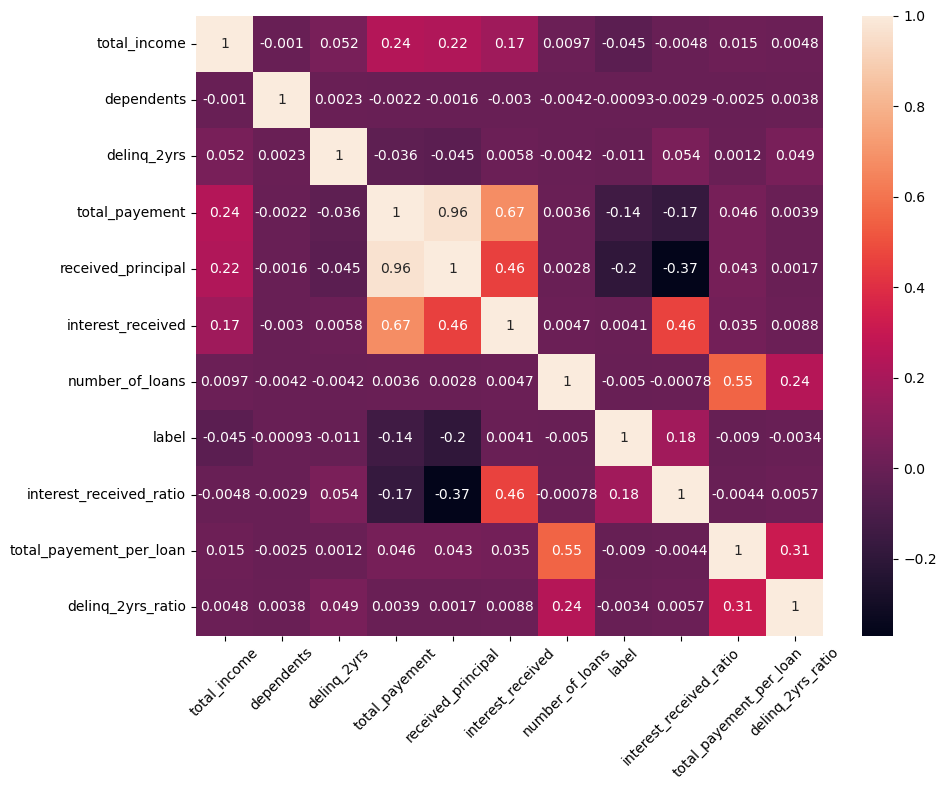

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<br> - Total payment and Received Principal are highly correlated (0.96)
<br> - Interest Received and Total payment are mildely correlated (0.67)

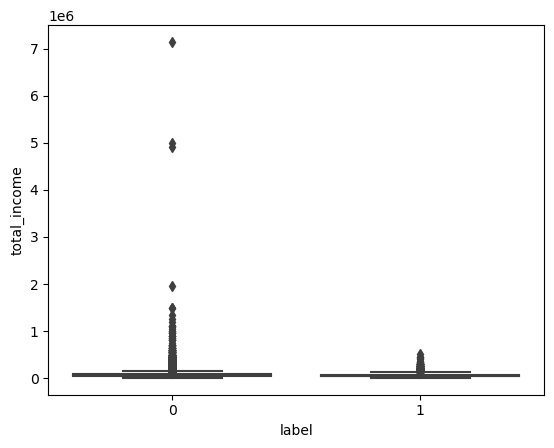

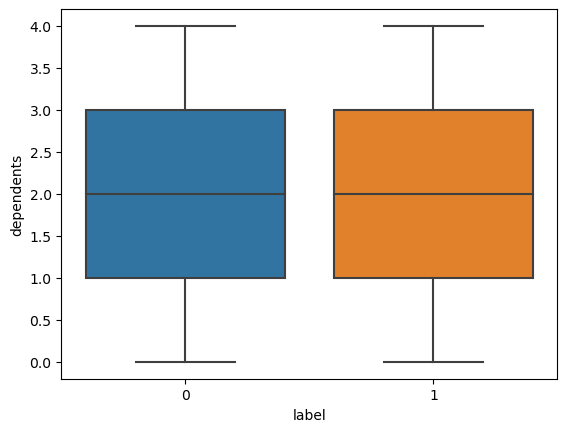

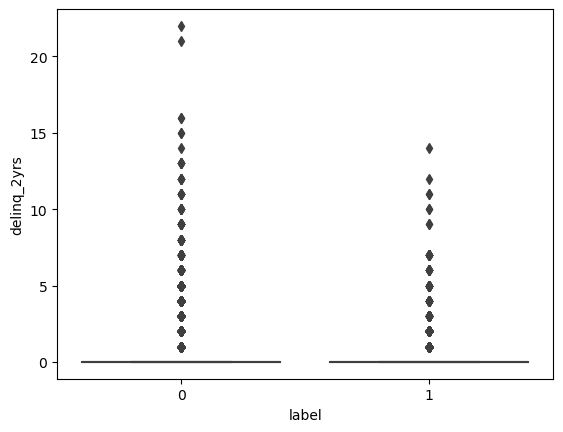

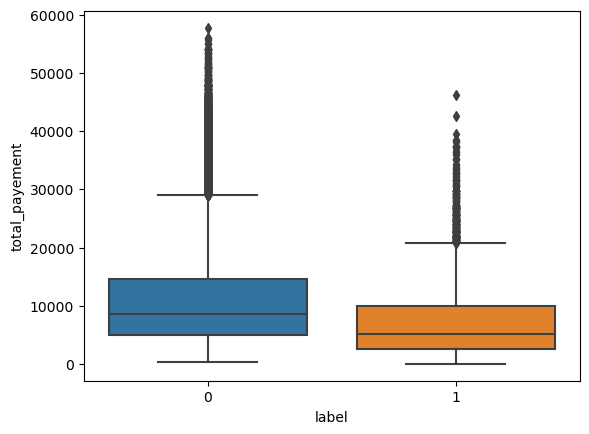

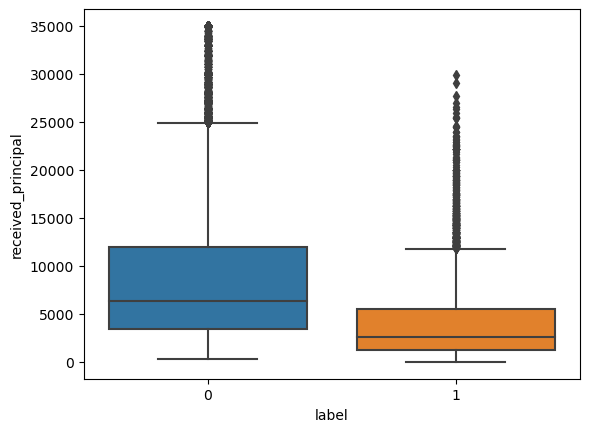

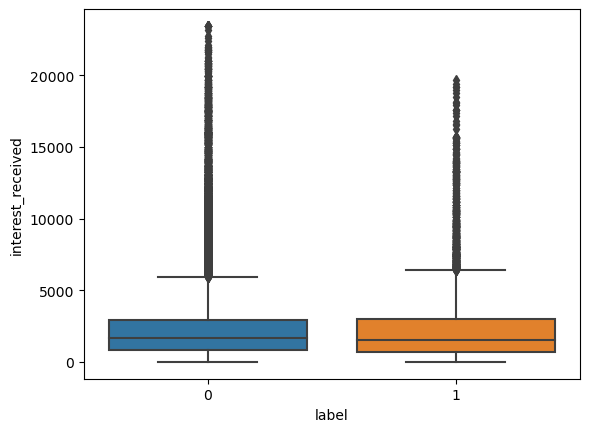

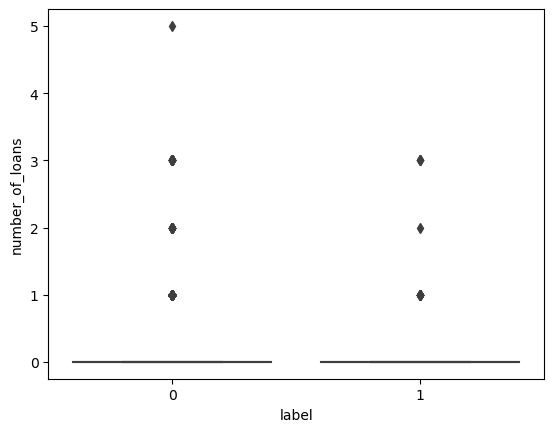

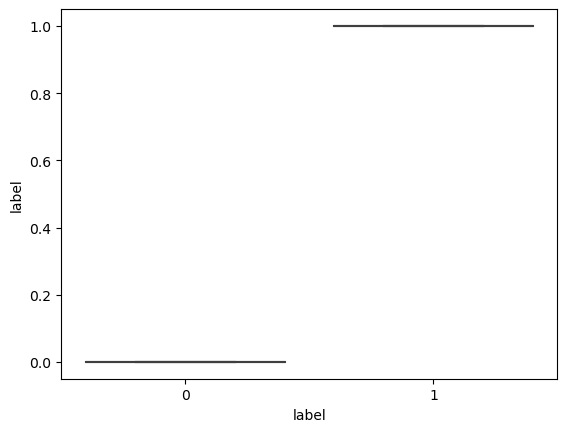

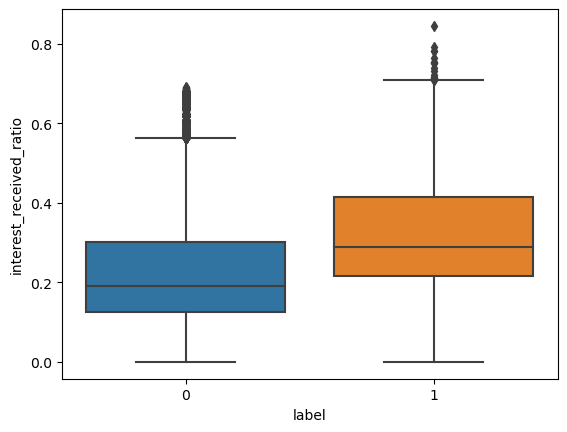

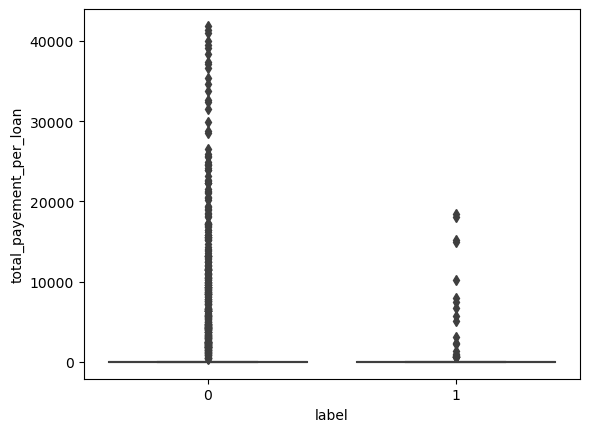

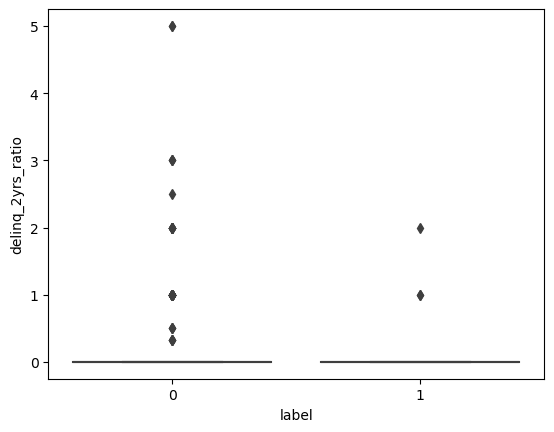

In [19]:
for col in train.select_dtypes(include=np.number).columns:
    sns.boxplot(data=train, x='label', y=col)
    plt.show()

- Distribution of Total Payment, Received Principal, Interest Received Ratio is different for Defaulters and Non-Defaulters
<br> 
<br>these can be some important features

In [20]:
#!pip install category_encoders
import category_encoders as ce

cat_cols = train.select_dtypes(include=['category', 'object']).columns
params = {"verbose":0,
          "cols":None,
          "drop_invariant":False,
          "return_df":True,
          "handle_missing":'value',
          "handle_unknown":'value',
          "min_samples_leaf":5000,
          "smoothing":1}

target_encoder = ce.TargetEncoder(**params)
target_encoder.fit(train[cat_cols], train['label'])

TargetEncoder(cols=['employment_type', 'tier_of_employment', 'industry', 'role',
                    'work_experience', 'gender', 'married', 'home_type',
                    'has_social_profile', 'is_verified'],
              min_samples_leaf=5000, smoothing=1)

In [21]:
train[cat_cols] = target_encoder.transform(train[cat_cols])
val[cat_cols] = target_encoder.transform(val[cat_cols])
hold_out[cat_cols] = target_encoder.transform(hold_out[cat_cols])
train.head()

,employment_type,tier_of_employment,industry,role,work_experience,total_income,gender,married,dependents,home_type,has_social_profile,is_verified,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,label,interest_received_ratio,total_payement_per_loan,delinq_2yrs_ratio
0,0.092297,0.085363,0.093154,0.093154,0.093154,125000.0,0.094948,0.092870,4,0.104819,0.094536,0.093539,0,1824.150000,971.46,852.69,0,1,0.467445,0.0,0.0
1,0.144136,0.145609,0.093154,0.093154,0.093154,61000.0,0.094948,0.093517,1,0.083747,0.090947,0.094030,0,22912.532998,18000.00,4912.53,0,0,0.214404,0.0,0.0
3,0.087003,0.087003,0.093154,0.100619,0.093154,30000.0,0.091740,0.093073,1,0.104819,0.093983,0.093539,0,6672.050000,5212.29,1459.76,0,0,0.218787,0.0,0.0
4,0.087003,0.087003,0.093154,0.100619,0.093154,65000.0,0.091740,0.093073,3,0.104819,0.094536,0.091098,0,11793.001345,10000.00,1793.00,0,0,0.152039,0.0,0.0
6,0.087003,0.087003,0.093154,0.100619,0.145105,90000.0,0.091740,0.093073,4,0.083747,0.090947,0.094030,0,13252.854964,11500.00,1733.99,0,0,0.130839,0.0,0.0


In [92]:
y_train = train['label']
y_val = val['label']
y_hold_out = hold_out['label']

train = train.drop(columns={'label'})
val = val.drop(columns={'label'})
hold_out = hold_out.drop(columns={'label'})

## Feature Selection

In [93]:
def random_forest_zero_importance(df, label, params):
    rf = RandomForestClassifier(**params)
    
    rf.fit(df, label)
    fi = pd.DataFrame({"features": df.columns, "importance": rf.feature_importances_})
    
    return fi

In [94]:
rf_params = {"n_estimators":250, 'criterion':'entropy','verbose':False, 'n_jobs':25}
rf_zero_imp = random_forest_zero_importance(train, y_train, rf_params)
rf_zero_imp

,features,importance
0,employment_type,0.009116
1,tier_of_employment,0.026075
2,industry,0.052510
3,role,0.015374
4,work_experience,0.055960
5,total_income,0.053921
6,gender,0.012900
7,married,0.013207
8,dependents,0.019476
9,home_type,0.009986


## Model Development

### Hyperparameter Tuning

In [95]:
result_ho = pd.DataFrame()
i = 0

def objective(space):
    
    global i
    global result_ho
    
    lgb_train = lgb.Dataset(train, y_train)
    lgb_val = lgb.Dataset(val, y_val)

    params = {
        'num_leaves': int(space['num_leaves']),
        'max_depth': int(space['max_depth']),
        'learning_rate': space['learning_rate'],
        'objective': 'binary',
        'metric': 'auc',
        "boosting": "gbdt",
        'feature_fraction' : space['feature_fraction'],
        'max_bin' : int(space['max_bin']),
        'min_data_in_leaf': int(space['min_data_in_leaf']),
        "min_data_in_bin": int(space['min_data_in_bin']),
        "bagging_freq": 20,
        "random_seed": 2019,
        "lambda_l1": space['lambda_l1'],
        "lambda_l2": space['lambda_l2'],
        'pos_bagging_fraction' : space['pos_bagging_fraction'],
        'neg_bagging_fraction' : space['neg_bagging_fraction'],
        'verbose': -1
    }

    evals_result = {}
    
    clf = lgb.train(params, lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                callbacks=[lgb.early_stopping(stopping_rounds=50)])
    gc.collect()
    
    result = pd.DataFrame(clf.params, index=[0])
    
    ## Calculating AUC
    pred_train = clf.predict(train[clf.feature_name()])
    pred_val = clf.predict(val[clf.feature_name()])
    pred_hold_out = clf.predict(hold_out[clf.feature_name()])

    gc.collect()
    train_auc = roc_auc_score(y_train, pred_train)
    val_auc = roc_auc_score(y_val, pred_val)
    hold_out_auc = roc_auc_score(y_hold_out, pred_hold_out)
    gc.collect()

    score = (abs(train_auc - val_auc) + 1)/((1+val_auc)*(1+val_auc))
    
    result["train_auc"] = train_auc
    result["val_auc"] = val_auc
    result["hold_out_auc"] = hold_out_auc
    result["train_test_diff"] = train_auc - val_auc
    result["n_estimators"] = clf.best_iteration
    result["score"] = score
    
    del clf
    
    result_ho = pd.concat([result_ho, result], ignore_index=True)

    result_ho.to_csv('hyperopt_results.csv', index=False)
    i = i+1
    
    return (score)

In [28]:
!pip install hyperopt
!pip install shap
from hyperopt import fmin, tpe, hp, anneal, Trials
import os
import gc

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for py4j from https://files.pythonhosted.org/packages/10/30/a58b32568f1623aaad7db22aa9eafc4c6c194b429ff35bdc55ca2726da47/py4j-0.10.9.7-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.6 MB 326.1 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.6 MB 353.1 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.6 MB 327.7 kB/s eta 0:00:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
    --------------------------------------- 10.2/453.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/453.1 kB 640.0 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/453.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/453.1 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 41.0/453.1 kB 393.8 kB/s eta 0:00:02
   ---- ---------------------------------- 51.2/453.

In [32]:
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 24, 1),
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.005, 0.015),
    'feature_fraction' : hp.uniform('feature_fraction', 0.1, 1),
    'max_bin' : hp.quniform('max_bin', 10, 100, 10),
    'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 25, 1000, 25),
    'lambda_l1' : hp.uniform('lambda_l1', 0, 50),
    'lambda_l2' : hp.uniform('lambda_l2', 0, 50),
    'min_data_in_bin' : hp.quniform('min_data_in_bin', 5, 100, 5),
    'pos_bagging_fraction' : hp.uniform('pos_bagging_fraction', 0.1, 1),
    'neg_bagging_fraction' : hp.uniform('neg_bagging_fraction', 0.1, 1)
    }

In [96]:
best=fmin(fn = objective,
          space = space, 
          algo = tpe.suggest,
          max_evals = 50,
          rstate = np.random.default_rng(7)
         )

Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[28]	val's auc: 0.892546
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3489]	val's auc: 0.940428
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[3160]	val's auc: 0.957497
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                               

Early stopping, best iteration is:                                                                                     
[3219]	val's auc: 0.948705
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[1480]	val's auc: 0.957555
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[4404]	val's auc: 0.960859
Training until validation scores don't improve for 50 rounds                                                           
Early stopping, best iteration is:                                                                                     
[2840]	val's auc: 0.961871
Training until validation scores don't improve for 5

## Model Selection

From Hyperopt Results we will choose best parameters according to following criteria. It is not necessary we use that particular hyperparameter
- High Score
- High Validation AUC
- Low Overfitting

In [97]:
hyperopt_results = pd.read_csv('hyperopt_results.csv')
hyperopt_results.sort_values(by='score')

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,bagging_freq,random_seed,lambda_l1,lambda_l2,pos_bagging_fraction,neg_bagging_fraction,verbose,num_iterations,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
21,12,8,0.013002,binary,auc,gbdt,0.667220,100,650,85,20,2019,6.625821,0.408127,0.659475,0.543975,-1,20000,0.969430,0.963953,0.962627,0.005477,2720,0.260682
49,22,12,0.011743,binary,auc,gbdt,0.782973,70,500,50,20,2019,1.757311,46.609937,0.690931,0.749593,-1,20000,0.971196,0.963785,0.962681,0.007411,2720,0.261227
33,16,9,0.014191,binary,auc,gbdt,0.880640,70,850,60,20,2019,8.456973,49.781930,0.745869,0.565340,-1,20000,0.967449,0.961871,0.960924,0.005578,2840,0.261261
24,7,9,0.012851,binary,auc,gbdt,0.679298,90,1000,85,20,2019,0.002865,29.676407,0.790077,0.529645,-1,20000,0.966699,0.961243,0.960274,0.005456,4644,0.261397
28,17,7,0.012484,binary,auc,gbdt,0.614111,70,850,90,20,2019,0.658624,1.086518,0.878181,0.623072,-1,20000,0.976544,0.965695,0.964794,0.010849,3577,0.261610
35,16,8,0.014979,binary,auc,gbdt,0.955744,70,575,70,20,2019,18.802046,15.635464,0.724112,0.598316,-1,20000,0.962686,0.958844,0.957695,0.003842,1813,0.261617
22,12,8,0.013083,binary,auc,gbdt,0.679697,100,625,100,20,2019,5.043579,30.566331,0.653018,0.131302,-1,20000,0.966988,0.960921,0.960192,0.006067,3659,0.261642
26,7,10,0.013586,binary,auc,gbdt,0.746150,70,975,85,20,2019,10.648733,31.562344,0.776586,0.543299,-1,20000,0.962856,0.958807,0.958200,0.004050,4410,0.261681
20,12,8,0.010081,binary,auc,gbdt,0.676448,100,650,80,20,2019,6.587791,17.147287,0.698597,0.130500,-1,20000,0.964685,0.959623,0.958834,0.005062,3657,0.261727
31,11,9,0.013851,binary,auc,gbdt,0.902935,90,600,80,20,2019,3.341727,21.076439,0.446660,0.713339,-1,20000,0.960722,0.957555,0.956086,0.003167,1480,0.261786


In [98]:
hyperopt_results.sort_values(by = 'val_auc', ascending=False).head(5)

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,bagging_freq,random_seed,lambda_l1,lambda_l2,pos_bagging_fraction,neg_bagging_fraction,verbose,num_iterations,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
28,17,7,0.012484,binary,auc,gbdt,0.614111,70,850,90,20,2019,0.658624,1.086518,0.878181,0.623072,-1,20000,0.976544,0.965695,0.964794,0.010849,3577,0.261610
21,12,8,0.013002,binary,auc,gbdt,0.667220,100,650,85,20,2019,6.625821,0.408127,0.659475,0.543975,-1,20000,0.969430,0.963953,0.962627,0.005477,2720,0.260682
49,22,12,0.011743,binary,auc,gbdt,0.782973,70,500,50,20,2019,1.757311,46.609937,0.690931,0.749593,-1,20000,0.971196,0.963785,0.962681,0.007411,2720,0.261227
33,16,9,0.014191,binary,auc,gbdt,0.880640,70,850,60,20,2019,8.456973,49.781930,0.745869,0.565340,-1,20000,0.967449,0.961871,0.960924,0.005578,2840,0.261261
24,7,9,0.012851,binary,auc,gbdt,0.679298,90,1000,85,20,2019,0.002865,29.676407,0.790077,0.529645,-1,20000,0.966699,0.961243,0.960274,0.005456,4644,0.261397


In [99]:
# check the minimum score and select the index as best parameter index
best_param_index = hyperopt_results.index[hyperopt_results['score'] == hyperopt_results['score'].min()].tolist()[0]
lgbm_params = dict(hyperopt_results.iloc[best_param_index,:19])

In [101]:
lgb_train = lgb.Dataset(train, y_train)
lgb_val = lgb.Dataset(val, y_val)
evals_result = {}
clf = lgb.train(lgbm_params, lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[2720]	val's auc: 0.963953


## Model Evaluation

In [102]:
pred_train = clf.predict(train[clf.feature_name()])
pred_val = clf.predict(val[clf.feature_name()])
pred_hold_out = clf.predict(hold_out[clf.feature_name()])

In [103]:
def roc_auc(target_list, pred_list):
    print(roc_auc_score(target_list[0], pred_list[0]))
    print(roc_auc_score(target_list[1], pred_list[1]))
    print(roc_auc_score(target_list[2], pred_list[2]))

In [104]:
#Printing ROC AUC, PR AUC for Class 1 and Class 0
print("ROC AUC")
roc_auc([y_train,y_val,y_hold_out], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 1 PR AUC")
pr_auc([y_train,y_val,y_hold_out], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 0 PR AUC")
pr_auc([1-y_train,1-y_val,1-y_hold_out], [1-pred_train, 1-pred_val, 1-pred_hold_out])
print("")

ROC AUC
0.9694299138670258
0.963952575509212
0.9626265363701233

Class 1 PR AUC
0.8795828218902471
0.8762350219713246
0.8658638466668743

Class 0 PR AUC
0.9961867766708796
0.994862559280282
0.9952422032721268



In [105]:
def roc_auc_curve(target_list, pred_list):
    
    fpr, tpr, thresholds = roc_curve(target_list[0], pred_list[0])
    fpr_val, tpr_val, thresholds_test = roc_curve(target_list[1], pred_list[1])
    fpr_hold_out, tpr_hold_out, thresholds_hold_out = roc_curve(target_list[2], pred_list[2])

    
    roc_auc = roc_auc_score(target_list[0], pred_list[0])
    roc_auc_val = roc_auc_score(target_list[1], pred_list[1])
    roc_auc_hold_out = roc_auc_score(target_list[2], pred_list[2])


    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'Train AUC = %0.3f' % roc_auc, color = 'C0')
    plt.plot(fpr_val, tpr_val, 'b', label = 'Val AUC = %0.3f' % roc_auc_val, color = 'C1')
    plt.plot(fpr_hold_out, tpr_hold_out, 'b', label = 'Hold Out AUC = %0.3f' % roc_auc_hold_out, color = 'C2')
    #plt.plot(fpr_true, tpr_true, 'b', label = 'True Values AUC = %0.3f' % roc_auc_oot, color = 'C3')

    plt.legend(loc='best')
    plt.plot([0, 1], [0, 1],'r--', color = 'black')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

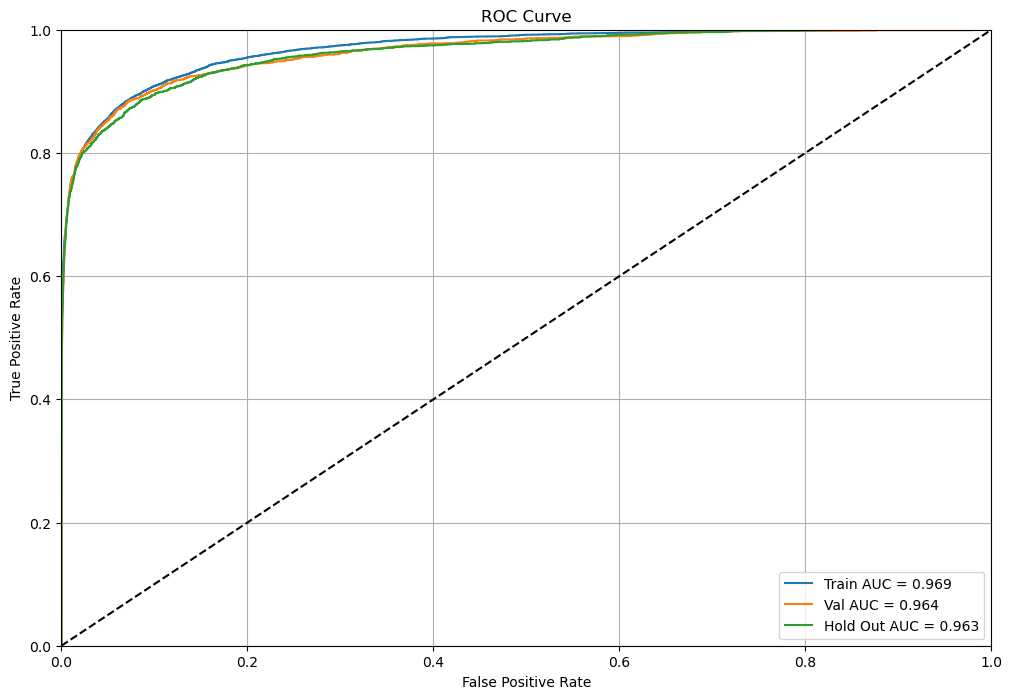

In [107]:
roc_auc_curve([y_train, y_val, y_hold_out], [pred_train, pred_val, pred_hold_out])

In [ ]:
def pr_auc_curve(target_list, pred_list):
    
    pr, re, thresholds = precision_recall_curve(target_list[0], pred_list[0])
    pr_val, re_val, thresholds_val = precision_recall_curve(target_list[1], pred_list[1])
    pr_hold_out, re_hold_out, thresholds_hold_out = precision_recall_curve(target_list[2], pred_list[2])
    
    precision_score_train = average_precision_score(target_list[0], pred_list[0])
    precision_score_val = average_precision_score(target_list[1], pred_list[1])
    precision_score_hold_out = average_precision_score(target_list[2], pred_list[2])
    
    plt.figure(figsize=(12, 8))
    plt.grid(True)
    plt.title('Precision Recall Curve')
    plt.plot(re, pr, 'b', label = 'Train Precision = %0.3f' % precision_score_train, color = 'C0')
    plt.plot(re_val, pr_val,  'b', label = 'Val Precision = %0.3f' % precision_score_val, color = 'C1')
    plt.plot(re_hold_out, pr_hold_out,  'b', label = 'Hold Out Precision = %0.3f' % precision_score_hold_out, color = 'C2')
    plt.legend(loc='best')
    #plt.plot([0, 1], [0, 1],'r--', color = 'black')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

PR Curve for Class 1


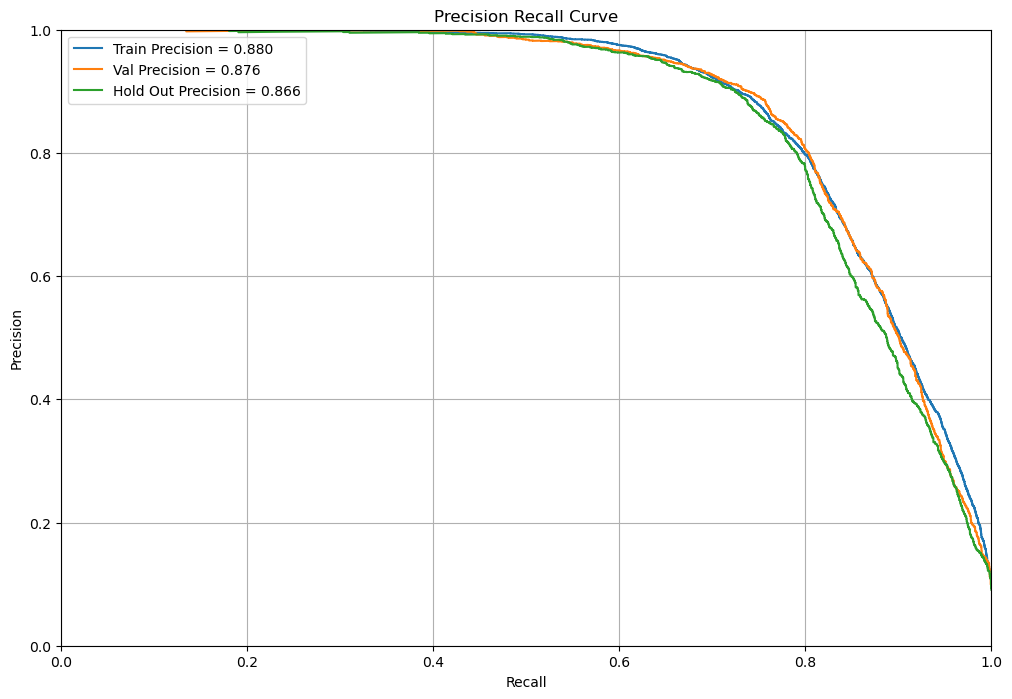

In [108]:
print("PR Curve for Class 1")
pr_auc_curve([y_train, y_val, y_hold_out], [pred_train, pred_val, pred_hold_out])

PR Curve for Class 0


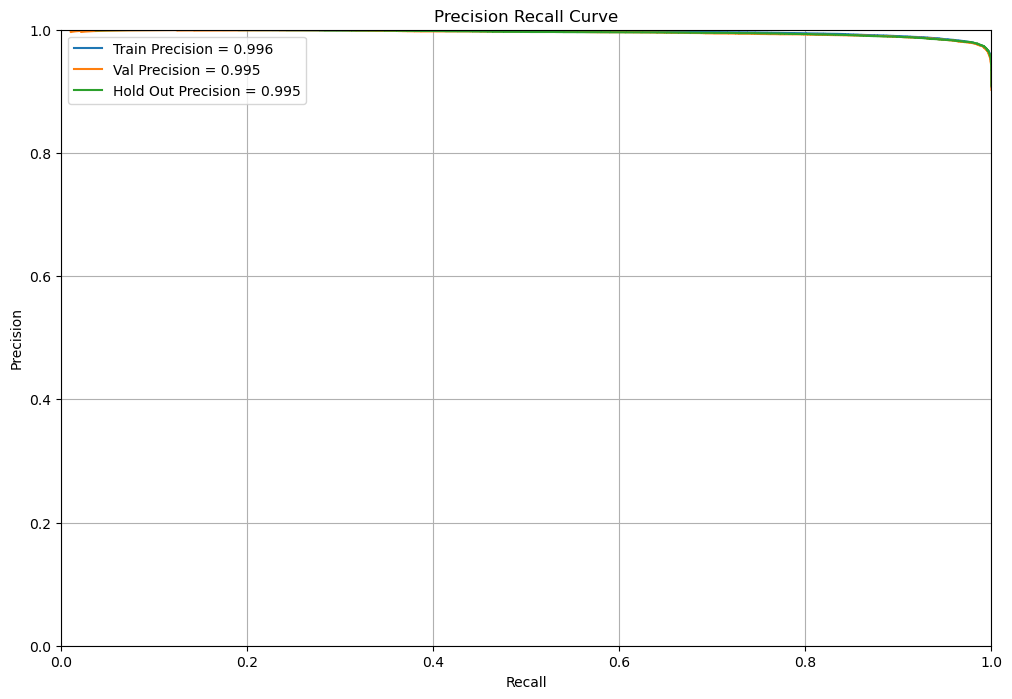

In [110]:
print("PR Curve for Class 0")
pr_auc_curve([1-y_train,1-y_val,1-y_hold_out], [1-pred_train, 1-pred_val, 1-pred_hold_out])

In [111]:
def score_distribution(target_list, pred_list, data_type_list):

    for i in range(len(data_type_list)):
        y_actual = target_list[i]
        y_predicted = pred_list[i]
        df_type = data_type_list[i]
        sub_df = pd.DataFrame({"y_actual": y_actual, "y_predicted": y_predicted})
        
        f, ax = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, figsize=(16, 6))
        sns.distplot(sub_df[sub_df['y_actual']==1].y_predicted.values, hist=True, kde=True, rug=False, label="Defaulter", ax=ax)
        sns.distplot(sub_df[sub_df['y_actual']==0].y_predicted.values, hist=True, kde=True, rug=False, label="Non-Defaulter", ax=ax)
        plt.xlabel('Predicted positive class score')
        plt.ylabel('Count')
        plt.title(str(df_type) +' Distribution of predicted score')
        plt.legend(loc="upper right")
        plt.show()

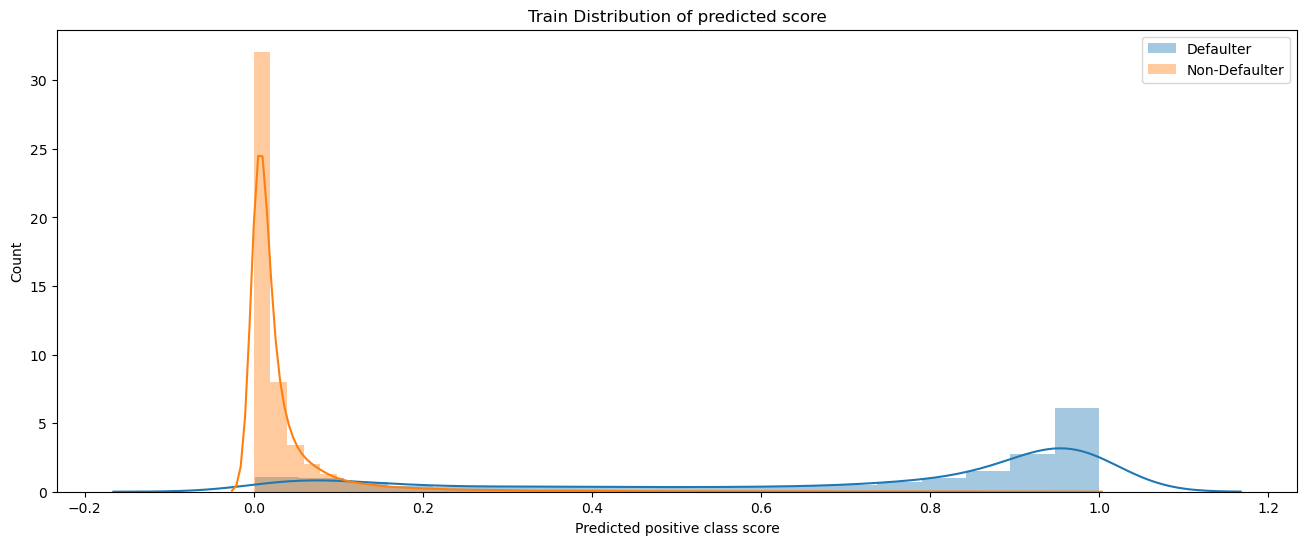

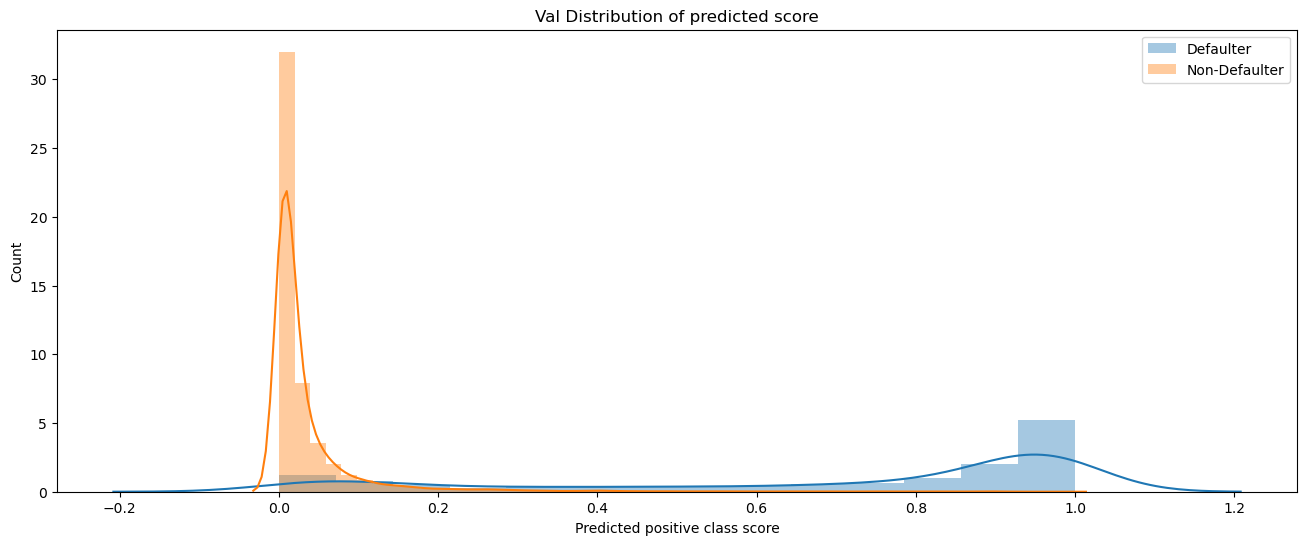

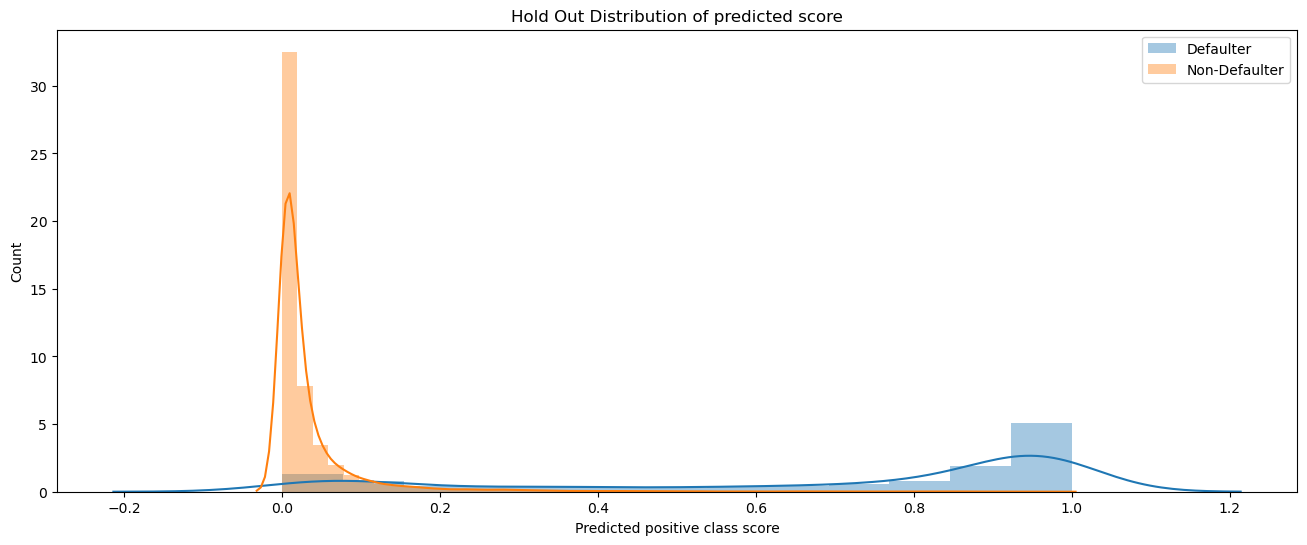

In [112]:
score_distribution([y_train, y_val, y_hold_out], [pred_train, pred_val, pred_hold_out], ["Train","Val","Hold Out"])

In [113]:
feature_importance = pd.DataFrame({"feature":clf.feature_name(),"split":clf.feature_importance('split'), "gain":clf.feature_importance('gain')}).sort_values(by = 'gain', ascending = False)
feature_importance.iloc[:10,:]

,feature,split,gain
14,received_principal,7058,288240.498682
17,interest_received_ratio,6062,203755.157504
13,total_payement,5288,118714.200390
2,industry,917,96849.445503
15,interest_received,3524,57041.950213
4,work_experience,505,47995.121077
1,tier_of_employment,1673,20071.294732
5,total_income,2304,14322.190305
0,employment_type,257,1559.329749
3,role,410,1169.866627


### SHAP

In [120]:
def shap_importance(model, data_list, data_type_list):

    try:
        explainer = shap.TreeExplainer(model)
    except Exception as e:
        print("Error occurred while creating SHAP explainer:", e)
        return
    
    for i, data in enumerate(data_list):
        try:
            tmp_shap_values = explainer.shap_values(data[model.feature_name()])
            shap.summary_plot(tmp_shap_values, data[model.feature_name()], plot_type="dot", max_display=20, show=False)
            plt.title(data_type_list[i] + " Shap Values")
            plt.xlabel("Mean SHAP Value")
            plt.ylabel("Features")
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.show()
        except Exception as e:
            print("Error occurred while visualizing SHAP values for", data_type_list[i], ":", e)


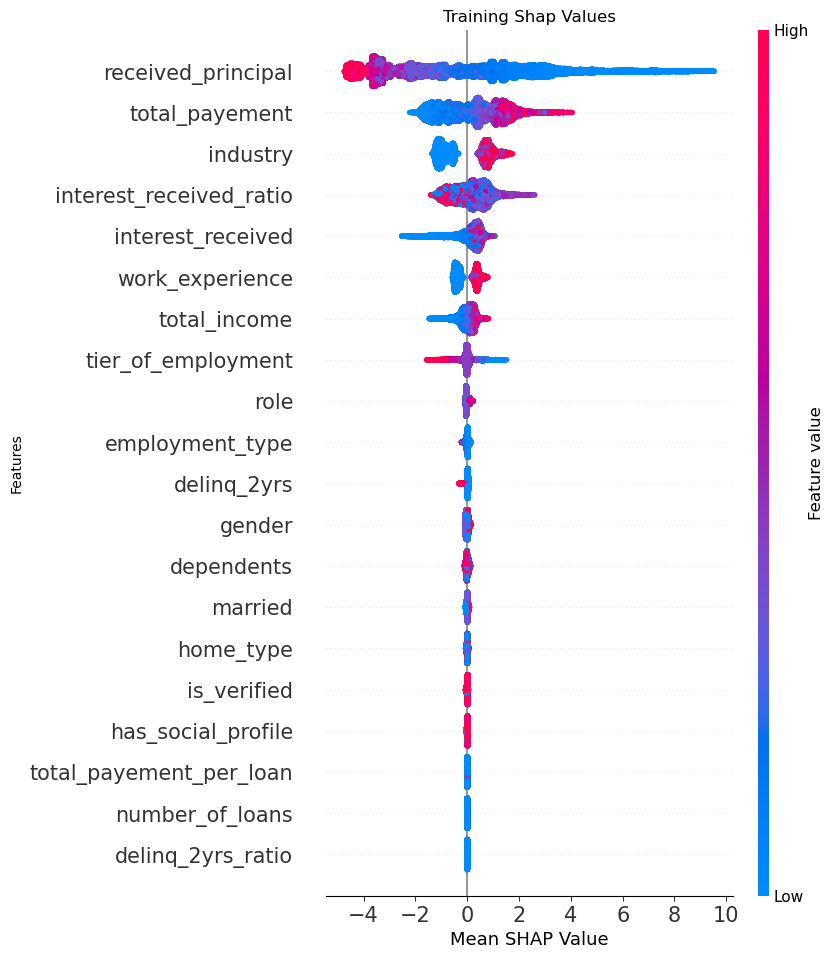

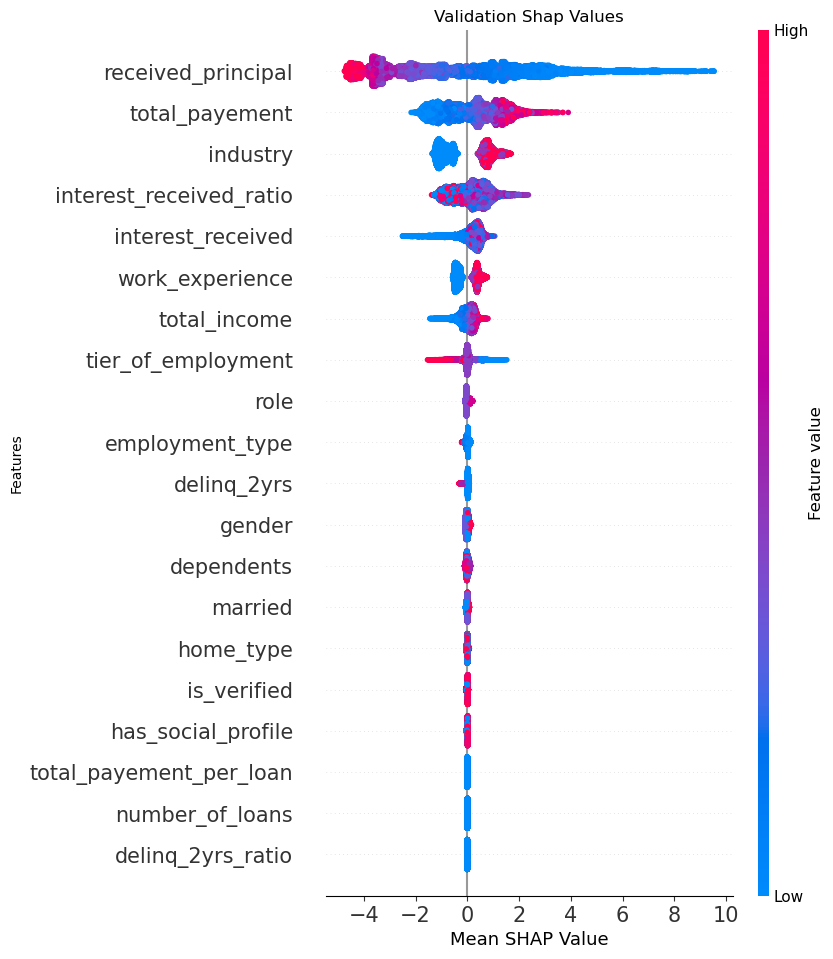

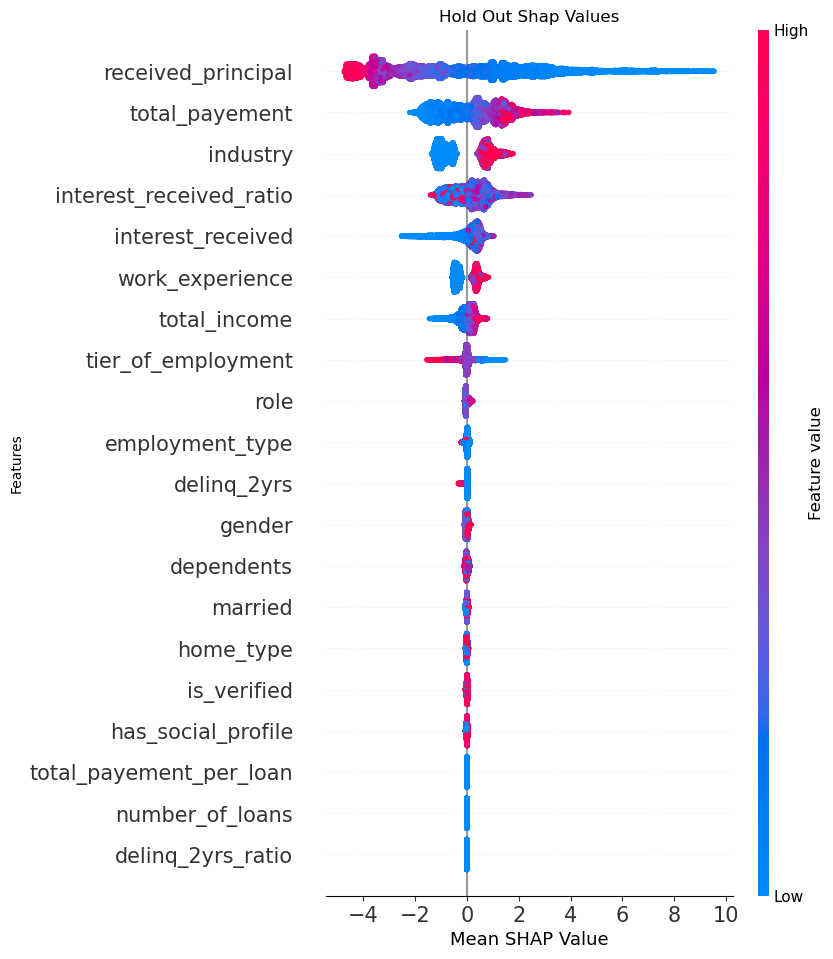

In [121]:
import shap
data_list = [train, val, hold_out]
data_type_list = ['Training', 'Validation', 'Hold Out']
shap_importance(clf, data_list, data_type_list)

Top features are consistent across Training, Validation, Hold Out (Higher the inconsistency, higher the chances the model is overfitting and will decay soon)

### Making Sense of Score

This Curve Tells 2 important things
1. Default rate across different score bucket for Train, Validation and Hold Out
2. User Distribution across different score bucket for Train, Validation and Hold Out

<br>
In Case User Distribution across different score bucket is very inconsistent in Train, Validation and Hold Out that means there is shift in domain of Out of Time Data

In [122]:
def class_rate(target_list, pred_list, data_type_list):

    def buckets(y_actual, y_predicted, bins):
        df = pd.DataFrame({"y_actual": y_actual, "y_predicted": y_predicted})
        if bins is None:
            out, bins = pd.qcut(y_predicted, 30, retbins=True)
            df['score_bucket'] = pd.cut(df["y_predicted"], bins=bins)#, labels=range(20))
            #df['score_bins'] = bins[0:20]
            return df, bins
        else:
            df['score_bucket'] = pd.cut(df["y_predicted"], bins=bins)#, labels=range(20))
            return df

    def slope_df(actual, predicted, data_type):
        slope = pd.DataFrame(columns=['score_bucket', 'score_bins','count', 'sum', 'positive_class_rate', 'volume_percentage','Data'])
        for i in range(len(data_type)):
            y_actual = actual[i]
            y_predicted = predicted[i]
            df_type = data_type[i]
            if df_type == "Train":
                df_bucket, bins = buckets(y_actual, y_predicted, None)
            else:
                df_bucket = buckets(y_actual, y_predicted, bins)
            df_slope = df_bucket.groupby(['score_bucket'])["y_actual"].agg(['count', 'sum']).sort_index(ascending=False).reset_index()
            df_slope['positive_class_rate'] = (df_slope['sum'] / df_slope['count'])
            df_slope['volume_percentage'] = df_slope['count'] / df_slope['count'].sum()
            df_slope['Data'] = df_type
            slope = pd.concat([df_slope, slope], ignore_index=True)
        slope = slope.reset_index(drop = True)
        return slope, bins

    def slope_plot(df):
        plt.figure(figsize=(12, 8))
        plt.grid(True)
        
        ax1 = sns.pointplot(x="score_bucket", y="positive_class_rate", data=df, hue="Data")
        ax1.set(ylabel="% Default", xlabel="Score Buckets")
        ax1.legend(loc='center right')
        ax1.set_xticklabels(df["score_bucket"].unique().tolist(), rotation=90)
        ax1.set_title("Bucket wise % Default")
        
        ax2 = ax1.twinx()
        ax2 = sns.barplot(x="score_bucket", y="volume_percentage", hue="Data", data=df, **{'alpha': 0.3})
        ax2.set(ylabel="Percentage of Volume", xlabel="")
        ax2.legend(loc='upper left')
        
        plt.show()

    slope, slope_bins = slope_df(target_list, pred_list, data_type_list)
    slope_plot(slope)


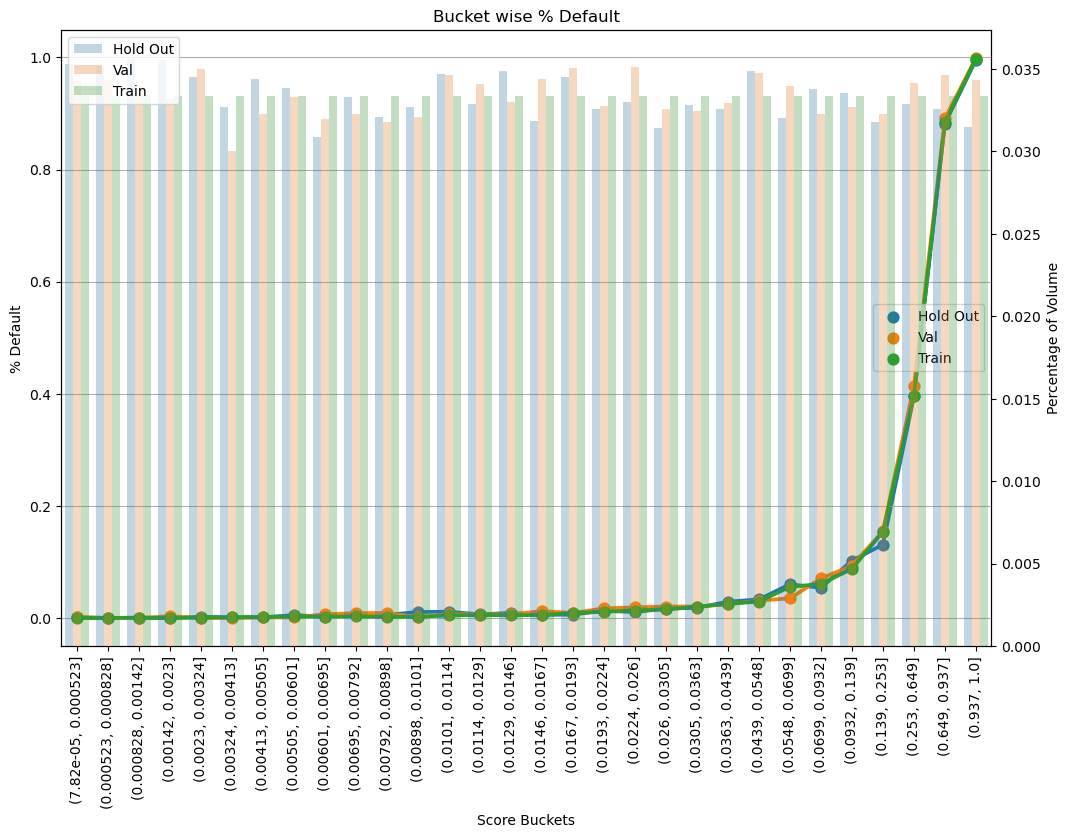

In [123]:
target_list = [y_train, y_val, y_hold_out]
pred_list = [pred_train, pred_val, pred_hold_out]
data_type_list = ['Train', 'Val', 'Hold Out']
class_rate(target_list, pred_list, data_type_list)

### Right Threshold

In [124]:
def cutoff_score(label, prediction, default_rate): 

    pred = pd.DataFrame({"label":label, "score":prediction}).sort_values(by = 'score').reset_index(drop = True)
    pred['cummulative_defaulters'] = pred['label'].cumsum(axis = 0)
    pred['cummulative_default'] = (pred['cummulative_defaulters']/pred.index).fillna(0)
    cutoff = pred[pred.cummulative_default<=default_rate]['score'].max()
    
    return cutoff

In [125]:
cutoff_score(y_val, pred_val, 0.01)

0.06760198593937111